In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Text Preprocessing
a = pd.read_csv("musk_csv.csv")
b=a.drop("ID", axis=1)
c=b.drop("molecule_name", axis=1)
d=c.drop("conformation_name", axis=1)
data = d
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1


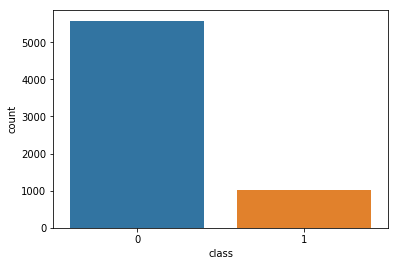

In [3]:
sns.countplot(x='class', data=data)  # arguments are passed to np.histogram
plt.show()

In [4]:
X = data.drop("class", axis=1)
Y = data['class']
X.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-244,-308,52,-7,39,126,156,-50,-112,96
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-235,-59,-2,52,103,136,169,-61,-136,79
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-238,-134,-154,57,143,142,165,-67,-145,39
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,136,168,-60,-135,80
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,137,168,-60,-135,80


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [6]:
X_train = X_train.T 
X_test = X_test.T 
X_train.shape

(166, 5278)

In [7]:
# Y_train.shape
Y_train = np.array(Y_train) 
Y_train=Y_train.reshape(-1,1)

Y_train = Y_train.T 
# Y_train.shape
Y_test = np.array(Y_test) 
Y_test=Y_test.reshape(-1,1)

Y_test = Y_test.T 
Y_test.shape

(1, 1320)

In [8]:
# 1. Initialize parameters / Define hyperparameters
# 2. Loop for num_iterations:
#     a. Forward propagation
#     b. Compute cost function
#     c. Backward propagation
#     d. Update parameters (using parameters, and grads from backprop) 
# 4. Use trained parameters to predict labels
    

In [9]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [10]:
def initialize(n_x, n_h, n_y):

    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.random.rand(n_h, 1)
    W2 = np.random.rand(n_y, n_h) * 0.01
    b2 = np.random.rand(n_y, 1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [11]:
def forward_prop(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache


In [12]:
def compute_cost(A2, Y, parameters):
    m = Y_train.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = - np.sum(logprobs) / m
    cost = np.squeeze(cost)

    return cost


In [13]:
def back_prop(parameters, cache, X, Y):
    m = Y_train.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.square(A1))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

In [14]:
def update_params(parameters, grads, alpha):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters


In [15]:
def predict(parameters, X,Y):
    A2, cache = forward_prop(X, parameters)
    predictions = np.round(A2)
    cost_test = compute_cost(A2, Y, parameters)
    return predictions,cost_test

In [25]:
def model(X, Y, num_iters=2600, alpha=0.1, print_cost=True):
    np.random.seed(3)
    
    parameters = initialize(n_x=X_train.shape[0],n_h= 120,n_y=Y_train.shape[0])
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    costs_train = []
    costs_test = []
    accuracy_train = []
    accuracy_test= []  
    for i in range(0, num_iters):

        A2, cache = forward_prop(X, parameters)

        cost = compute_cost(A2, Y, parameters)
#         print(cost.shape)
        grads = back_prop(parameters, cache, X, Y)
    
        parameters = update_params(parameters, grads, alpha)
        
        if print_cost  and i % 100 == 0:
            m=X.shape[1]
            p=np.zeros((1,m))
#             print ("CostTrain after iteration %i: %f" %(i, cost))
            for x in range (0,A2.shape[1]):
                if A2[0,x] >  0.5:
                    p[0,x] = 1
                else:
                    p[0,x] = 0
             
            acc_train = np.sum((p==Y)/m)
#             print ("AccuracyTrain after iteration %i: %f" %(i, acc_train ))
            
            
            predictions,cost_test = predict(parameters, X_test,Y_test)
#             print ("CostTest after iteration %i: %f" %(i, cost_test))
            acc_test=float((np.dot(Y_test, predictions.T) + np.dot(1 - Y_test, 1 - predictions.T)) / float(Y_test.size))
#             print ("AccuracyTest after iteration %i: %f" %(i, acc_test ))
            
            print('Iteration: %i Train Cost: %f || Test Cost: %f' %(i,cost,cost_test))
            print('             Train Accuracy: %f || Test Accuracy: %f' %(cost,cost_test))
            
        if print_cost and i % 100 == 0:
            costs_train.append(cost)
            costs_test.append(cost_test)
            accuracy_train.append(acc_train)
            accuracy_test.append(acc_test)
            
#     print(costs_train)
    
    plt.figure()
    plt.plot(np.squeeze(costs_train))
    plt.plot(np.squeeze(costs_test))
    plt.title('model Loss')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.figure()
    plt.plot(accuracy_train)
    plt.plot(accuracy_test)
    plt.title('model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

        
    return parameters

Iteration: 0 Train Cost: 0.910155 || Test Cost: 0.113962
             Train Accuracy: 0.910155 || Test Accuracy: 0.113962
Iteration: 100 Train Cost: 0.299344 || Test Cost: 0.065549
             Train Accuracy: 0.299344 || Test Accuracy: 0.065549
Iteration: 200 Train Cost: 0.208198 || Test Cost: 0.059961
             Train Accuracy: 0.208198 || Test Accuracy: 0.059961
Iteration: 300 Train Cost: 0.122546 || Test Cost: 0.037616
             Train Accuracy: 0.122546 || Test Accuracy: 0.037616
Iteration: 400 Train Cost: 0.095096 || Test Cost: 0.028348
             Train Accuracy: 0.095096 || Test Accuracy: 0.028348
Iteration: 500 Train Cost: 0.074202 || Test Cost: 0.023246
             Train Accuracy: 0.074202 || Test Accuracy: 0.023246
Iteration: 600 Train Cost: 0.059928 || Test Cost: 0.018568
             Train Accuracy: 0.059928 || Test Accuracy: 0.018568
Iteration: 700 Train Cost: 0.080864 || Test Cost: 0.025520
             Train Accuracy: 0.080864 || Test Accuracy: 0.025520
Iteration:

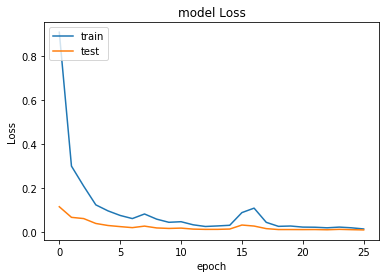

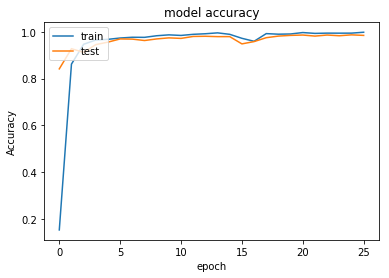

In [26]:
parameters=model(X_train, Y_train) 

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test.T,predictions.T))
print(confusion_matrix(Y_test.T,predictions.T))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1111
           1       0.98      0.92      0.95       209

   micro avg       0.98      0.98      0.98      1320
   macro avg       0.98      0.96      0.97      1320
weighted avg       0.98      0.98      0.98      1320

[[1108    3]
 [  17  192]]


In [27]:
predictions,cost_test = predict(parameters,X_test,Y_test)
print ('Accuracy: %d' % float((np.dot(Y_test, predictions.T) + np.dot(1 - Y_test, 1 - predictions.T)) / float(Y_test.size) * 100) + '%')

Accuracy: 98%
